# Class 02 Time Series

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [2]:
df_sales = pd.read_csv("./dataset.csv")
df_sales

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396
...,...,...
360,2023-12-27,74.935570
361,2023-12-28,71.374857
362,2023-12-29,57.806920
363,2023-12-30,62.340244


In [3]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Data          365 non-null    object 
 1   Total_Vendas  365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


### Data Preparation

In [4]:
df_sales["Data"] = pd.to_datetime(df_sales["Data"])
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data          365 non-null    datetime64[ns]
 1   Total_Vendas  365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [5]:
df_sales = df_sales.sort_values("Data")
df_sales

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396
...,...,...
360,2023-12-27,74.935570
361,2023-12-28,71.374857
362,2023-12-29,57.806920
363,2023-12-30,62.340244


In [6]:
time_series = df_sales.set_index("Data")["Total_Vendas"]
time_series

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Name: Total_Vendas, Length: 365, dtype: float64

In [7]:
time_series = time_series.asfreq("D")
time_series

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Freq: D, Name: Total_Vendas, Length: 365, dtype: float64

### EDA

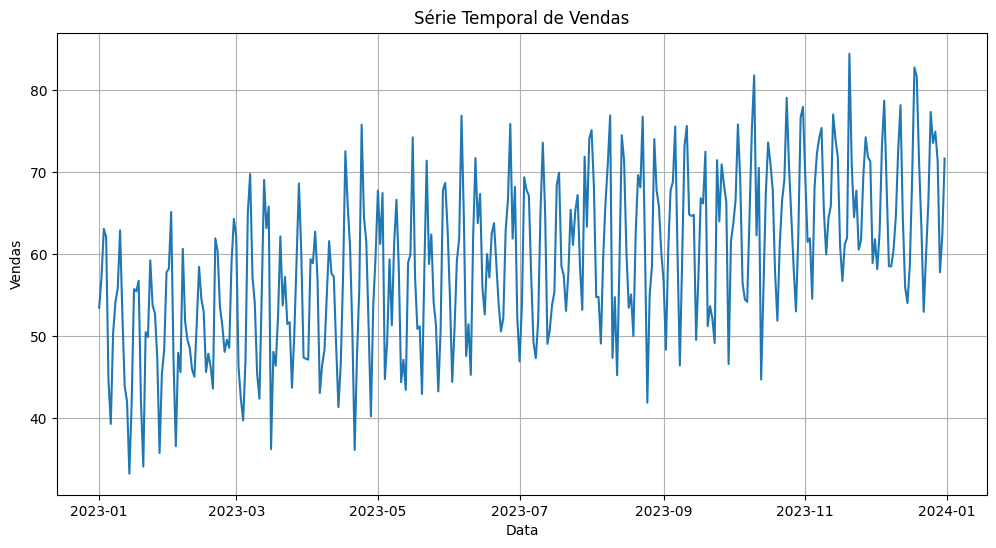

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(time_series)
plt.xlabel("Data")
plt.ylabel("Vendas")
plt.title("Série Temporal de Vendas")
plt.grid(True)
plt.show()

### Pedictive Modeling

In [9]:
model = SimpleExpSmoothing(time_series)
model

In [10]:
model_fit = model.fit(smoothing_level=0.2)
model_fit

C:\Users\emanu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\util\_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [11]:
expSmoothing = model_fit.fittedvalues
expSmoothing

Data
2023-01-01    53.483571
2023-01-02    53.483571
2023-01-03    54.222255
2023-01-04    55.995349
2023-01-05    57.217076
                ...    
2023-12-27    68.660021
2023-12-28    69.915131
2023-12-29    70.207076
2023-12-30    67.727045
2023-12-31    66.649685
Freq: D, Length: 365, dtype: float64

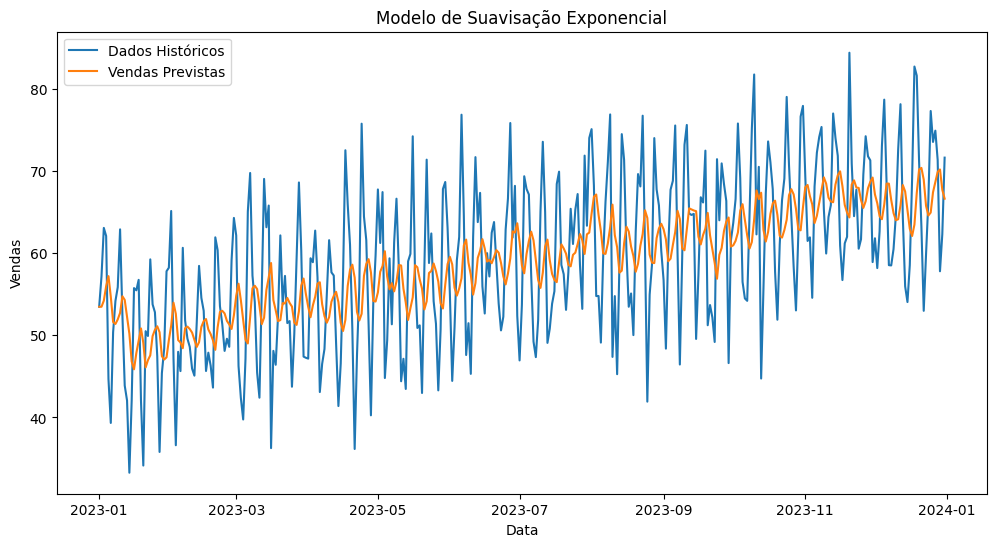

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(time_series, label="Dados Históricos")
plt.plot(expSmoothing, label="Vendas Previstas", linestyle = "-")
plt.xlabel("Data")
plt.ylabel("Vendas")
plt.title("Modelo de Suavisação Exponencial")
plt.legend()
plt.show()

### Forecast Deploy

In [13]:
forecast = model_fit.forecast(steps=1)
print(f"Previsão para total de vendas: {forecast}")

Previsão para total de vendas: 2024-01-01    67.649892
Freq: D, dtype: float64
